In [1]:
# imports/config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
# calculate differences between browser and os data
def get_keydown_time_differences(browser) -> tuple[list, list]:
    diffs_manual = [] 
    diffs_machine = []
    for i in range(0, len(browser), 2):
        assert browser['type'].loc[i + 1] == 'keyup' and browser['type'].loc[i] == 'keydown'

        hold_time_browser_natural =  abs(browser['browser_natural'].loc[i + 1] - browser['browser_natural'].loc[i])
        hold_time_os_natural =  abs(browser['os_natural'].loc[i + 1] - browser['os_natural'].loc[i])

        hold_time_browser_machine =  abs(browser['browser_machine'].loc[i + 1] - browser['browser_machine'].loc[i])
        hold_time_os_machine =  abs(browser['os_machine'].loc[i + 1] - browser['os_machine'].loc[i])

        diffs_manual.append(abs(hold_time_browser_natural - hold_time_os_natural))
        diffs_machine.append(abs(hold_time_browser_machine - hold_time_os_machine))

    assert len(diffs_manual) == len(diffs_machine) == (len(browser) / 2)

    return (diffs_manual, diffs_machine)



In [3]:
def calc(data: tuple[list, list]):
    manual = data[0]
    machine = data[1]

    print('Manual')
    print('Min: ', min(manual))
    print('Max: ', max(manual))
    print('Mean:',  sum(manual) / len(manual))
    print('STD: ', np.std(manual))

    print('Machine')
    print('Min: ', min(machine))
    print('Max: ', max(machine))
    print('Mean:',  sum(machine) / len(machine))
    print('STD: ', np.std(machine))

Manual
Min:  3.500000000489223e-06
Max:  0.0012091000000040708
Mean: 0.000324075000000198
STD:  0.00023137343381489912
Machine
Min:  1.100000000070489e-05
Max:  0.0013684000000004914
Mean: 0.0004903600000001914
STD:  0.0002500108237655531


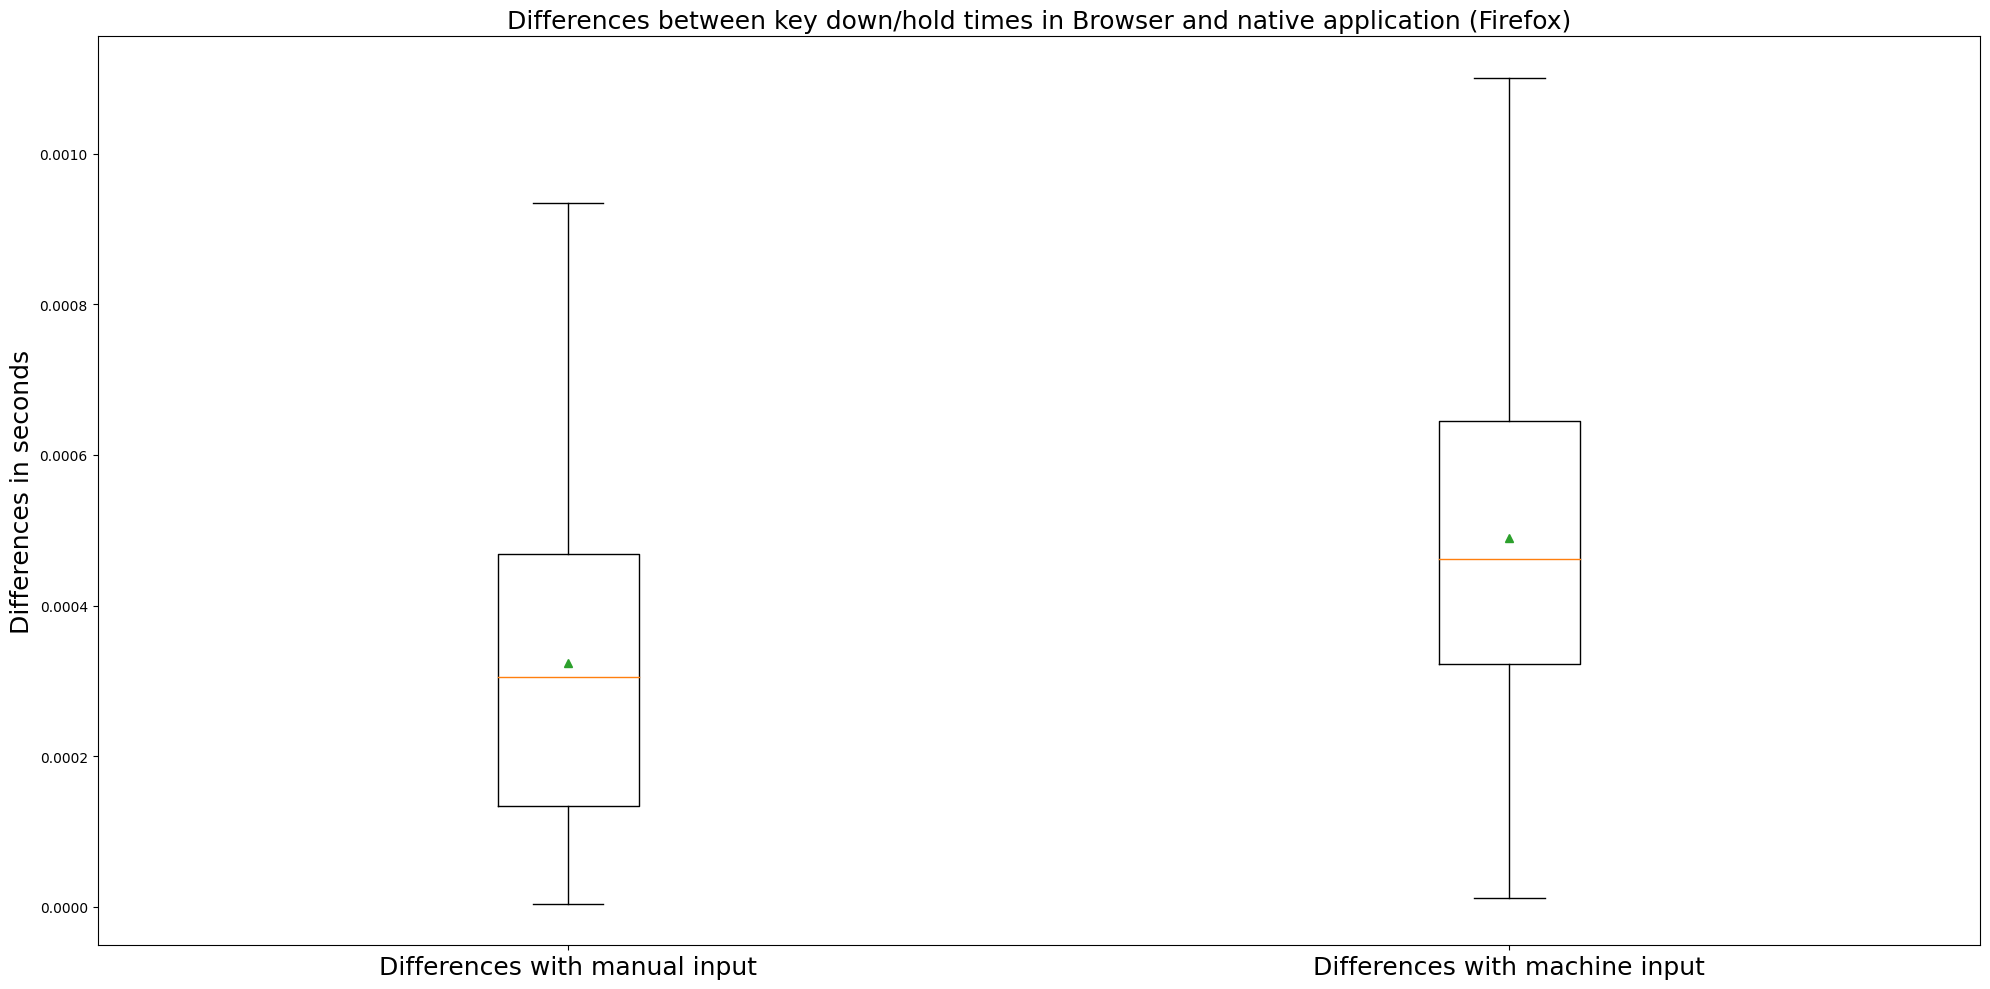

In [4]:
# firefox
firefox = pd.read_csv("./firefox/complete.csv")
firefox_diffs = get_keydown_time_differences(firefox)
calc(firefox_diffs)
firefox_diffs_manual = firefox_diffs[0]
firefox_diffs_machine = firefox_diffs[1]

# plot firefox
plt.boxplot([firefox_diffs_manual, firefox_diffs_machine], labels=["Differences with manual input",
            "Differences with machine input"], showfliers=False, showmeans=True)
plt.title("Differences between key down/hold times in Browser and native application (Firefox)", fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel("", fontsize=18)
plt.ylabel("Differences in seconds", fontsize=18)
plt.tight_layout()
plt.savefig("./firefox/fig_holdtime.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()

Manual
Min:  7.110000000132288e-05
Max:  0.02286540000000059
Mean: 0.007065458999999963
STD:  0.005371849213279952
Machine
Min:  0.006335599999999801
Max:  0.023162299999999636
Mean: 0.008166766000000006
STD:  0.002399533057918582


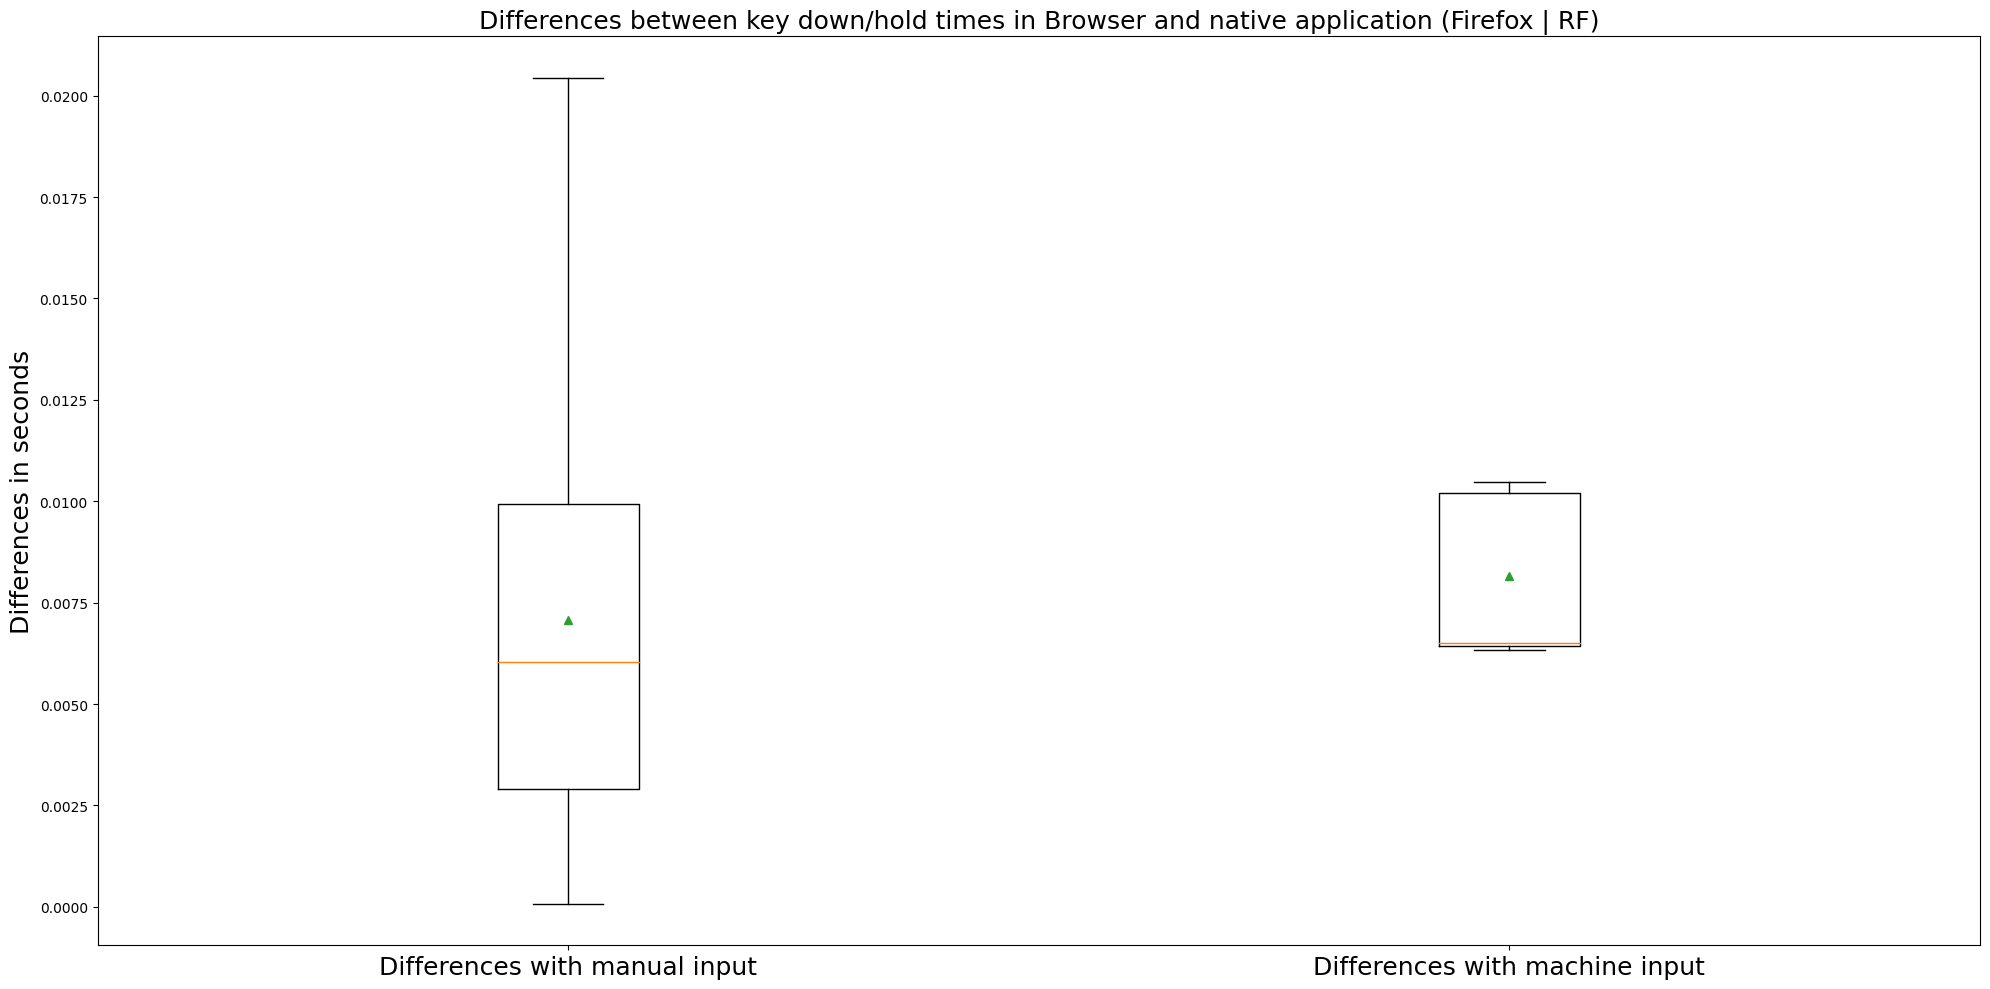

In [10]:
# firefox resistFingerprinting
firefox = pd.read_csv("./firefox_resistF/complete.csv")
firefox_diffs = get_keydown_time_differences(firefox)
calc(firefox_diffs)
firefox_diffs_manual = firefox_diffs[0]
firefox_diffs_machine = firefox_diffs[1]

# plot firefox
plt.boxplot([firefox_diffs_manual, firefox_diffs_machine], labels=["Differences with manual input",
            "Differences with machine input"], showfliers=False, showmeans=True)
plt.title("Differences between key down/hold times in Browser and native application (Firefox | RF)", fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel("", fontsize=18)
plt.ylabel("Differences in seconds", fontsize=18)
plt.tight_layout()
plt.savefig("./firefox_resistF/fig_holdtime.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()

Manual
Min:  6.699999999693063e-06
Max:  0.0009962999284764962
Mean: 0.0002763039996184328
STD:  0.00019571890325954973
Machine
Min:  3.460000477062408e-05
Max:  0.0009713999570832854
Mean: 0.00036775899489830543
STD:  0.00019189642514020653


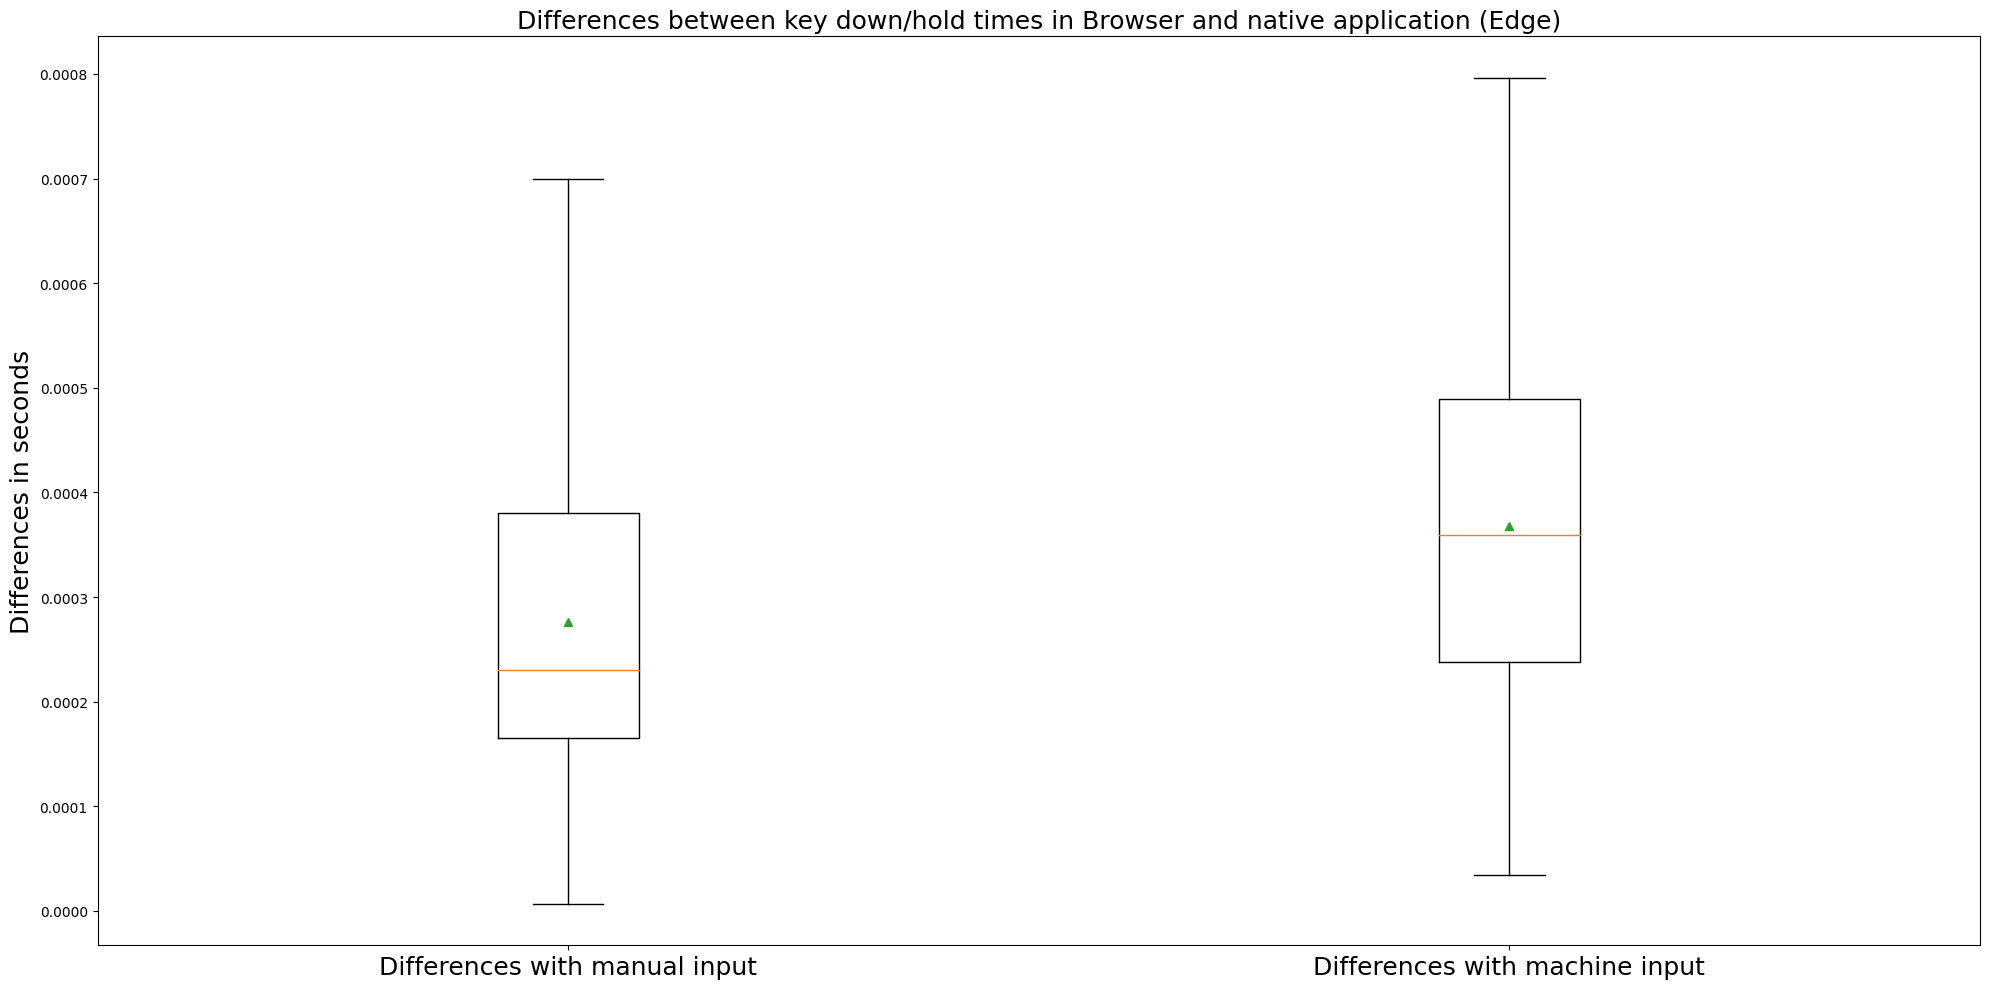

In [5]:
# edge
edge = pd.read_csv("./edge/complete.csv")
edge_diffs = get_keydown_time_differences(edge)
calc(edge_diffs)
edge_diffs_manual = edge_diffs[0]
edge_diffs_machine = edge_diffs[1]


# plot edge
plt.boxplot([edge_diffs_manual, edge_diffs_machine], labels=["Differences with manual input",
            "Differences with machine input"], showfliers=False, showmeans=True)
plt.title("Differences between key down/hold times in Browser and native application (Edge)", fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel("", fontsize=18)
plt.ylabel("Differences in seconds", fontsize=18)
plt.tight_layout()
plt.savefig("./edge/fig_holdtime.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()

Manual
Min:  2.000028604953741e-06
Max:  0.0009235999618555368
Mean: 0.0002686800026704016
STD:  0.0001936236971649636
Machine
Min:  1.1299976158340996e-05
Max:  0.006787200005961225
Mean: 0.00029584600001192037
STD:  0.0006671408206813901


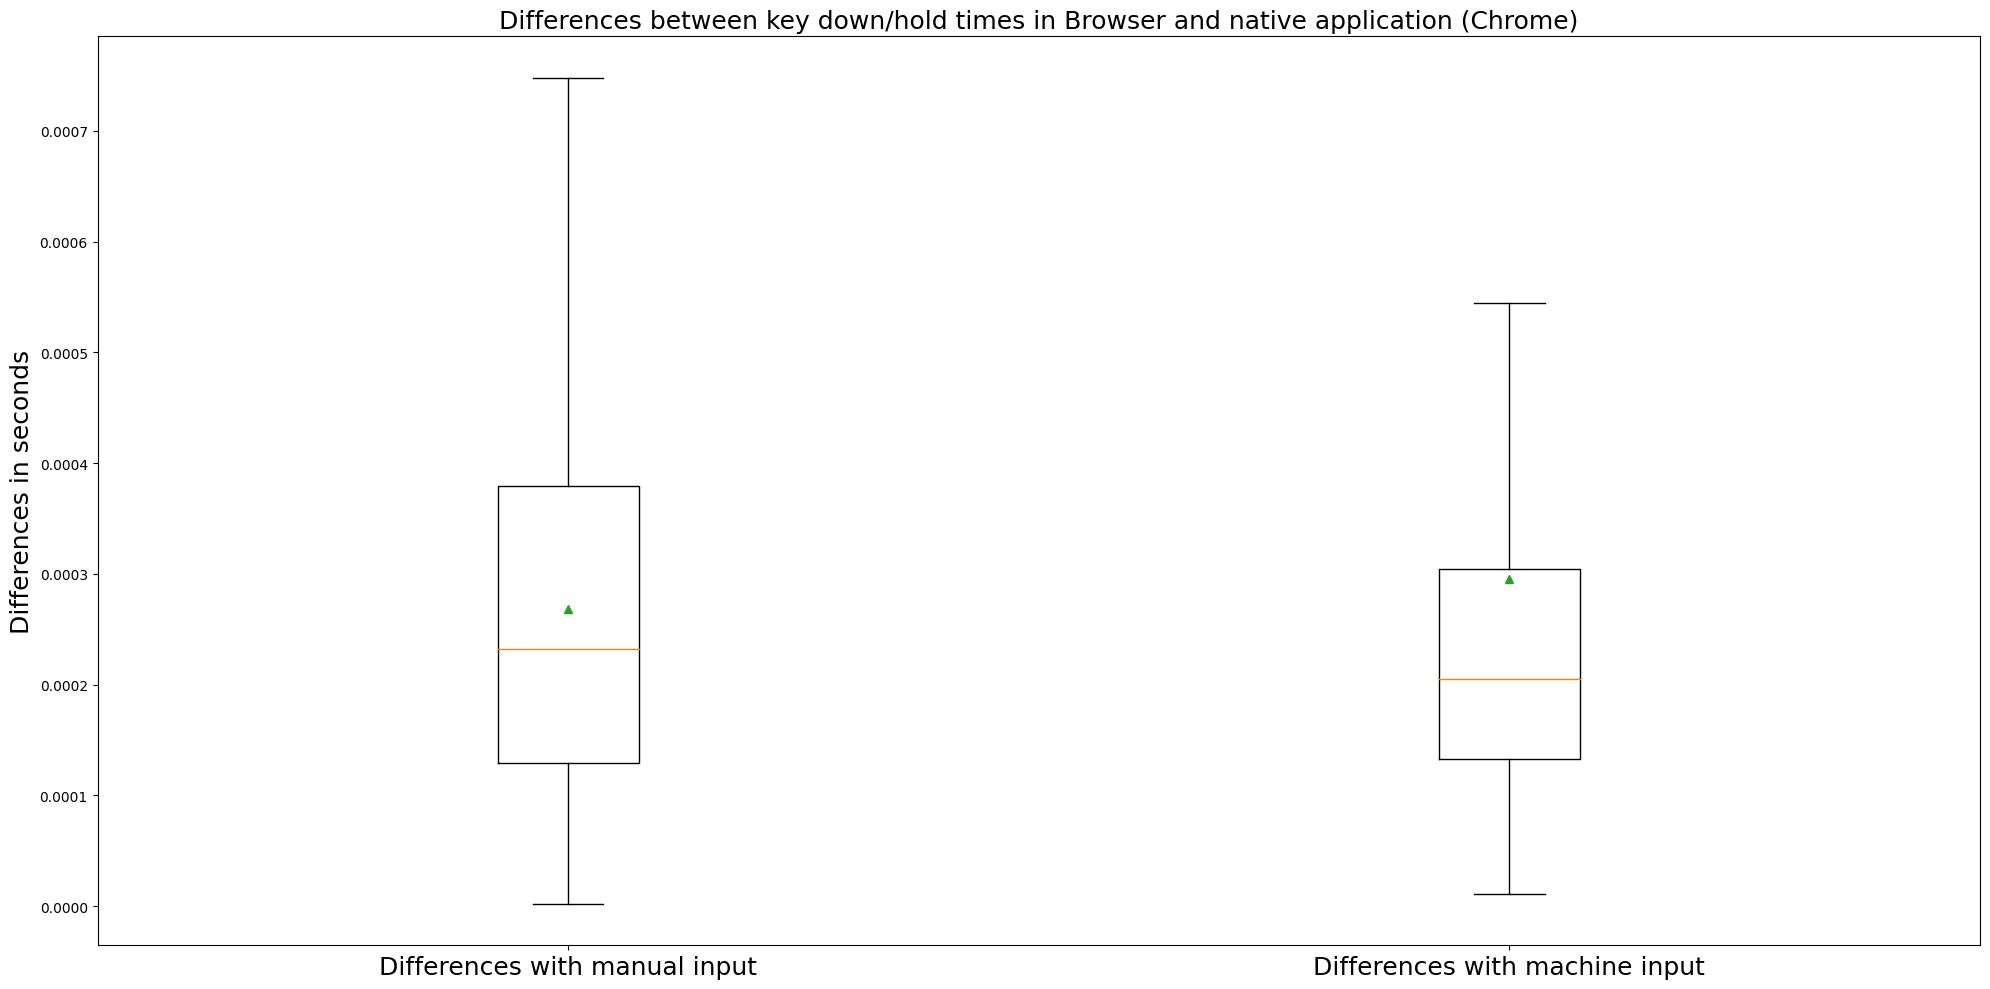

In [6]:
# chrome
chrome = pd.read_csv("./chrome/complete.csv")
chrome_diffs = get_keydown_time_differences(chrome)
calc(chrome_diffs)
chrome_diffs_manual = chrome_diffs[0]
chrome_diffs_machine = chrome_diffs[1]

# plot chrome
plt.boxplot([chrome_diffs_manual, chrome_diffs_machine], labels=["Differences with manual input",
            "Differences with machine input"], showfliers=False, showmeans=True)
plt.title("Differences between key down/hold times in Browser and native application (Chrome)", fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel("", fontsize=18)
plt.ylabel("Differences in seconds", fontsize=18)
plt.tight_layout()
plt.savefig("./chrome/fig_holdtime.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()

Manual
Min:  3.900009534874016e-06
Max:  0.0011782000286100214
Mean: 0.00028405400576893237
STD:  0.00019758792461071567
Machine
Min:  1.0399957083961908e-05
Max:  0.0016259999332461916
Mean: 0.0003226199925615284
STD:  0.00024208997321251242


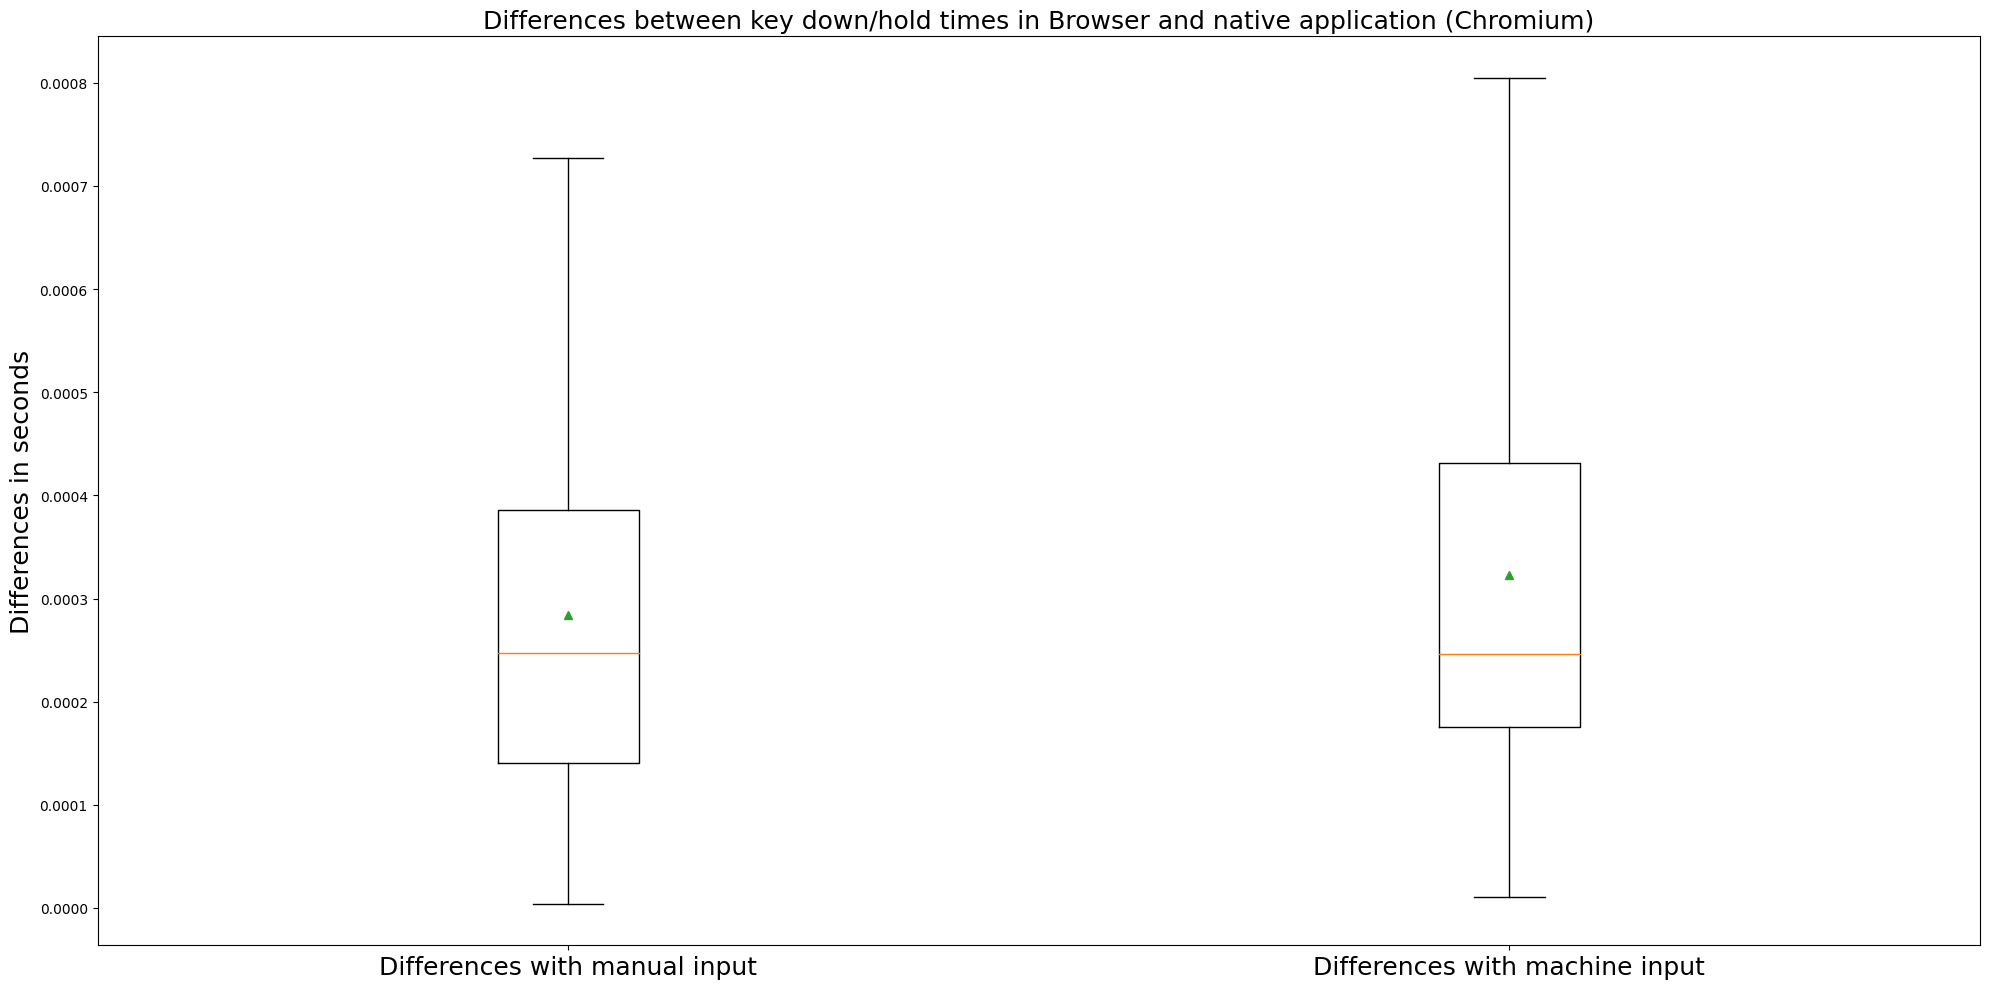

In [7]:
# chromium
chromium = pd.read_csv("./chromium/complete.csv")
chromium_diffs = get_keydown_time_differences(chromium)
calc(chromium_diffs)
chromium_diffs_manual = chromium_diffs[0]
chromium_diffs_machine = chromium_diffs[1]


# plot chromium
plt.boxplot([chromium_diffs_manual, chromium_diffs_machine], labels=["Differences with manual input",
            "Differences with machine input"], showfliers=False, showmeans=True)
plt.title("Differences between key down/hold times in Browser and native application (Chromium)", fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel("", fontsize=18)
plt.ylabel("Differences in seconds", fontsize=18)
plt.tight_layout()
plt.savefig("./chromium/fig_holdtime.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()

Manual
Min:  1.1300000000602495e-05
Max:  0.019844500000001375
Mean: 0.007758129000000173
STD:  0.005522540144920579
Machine
Min:  0.006081000000000003
Max:  0.022877699999995116
Mean: 0.007931846000000011
STD:  0.0024587940473497012


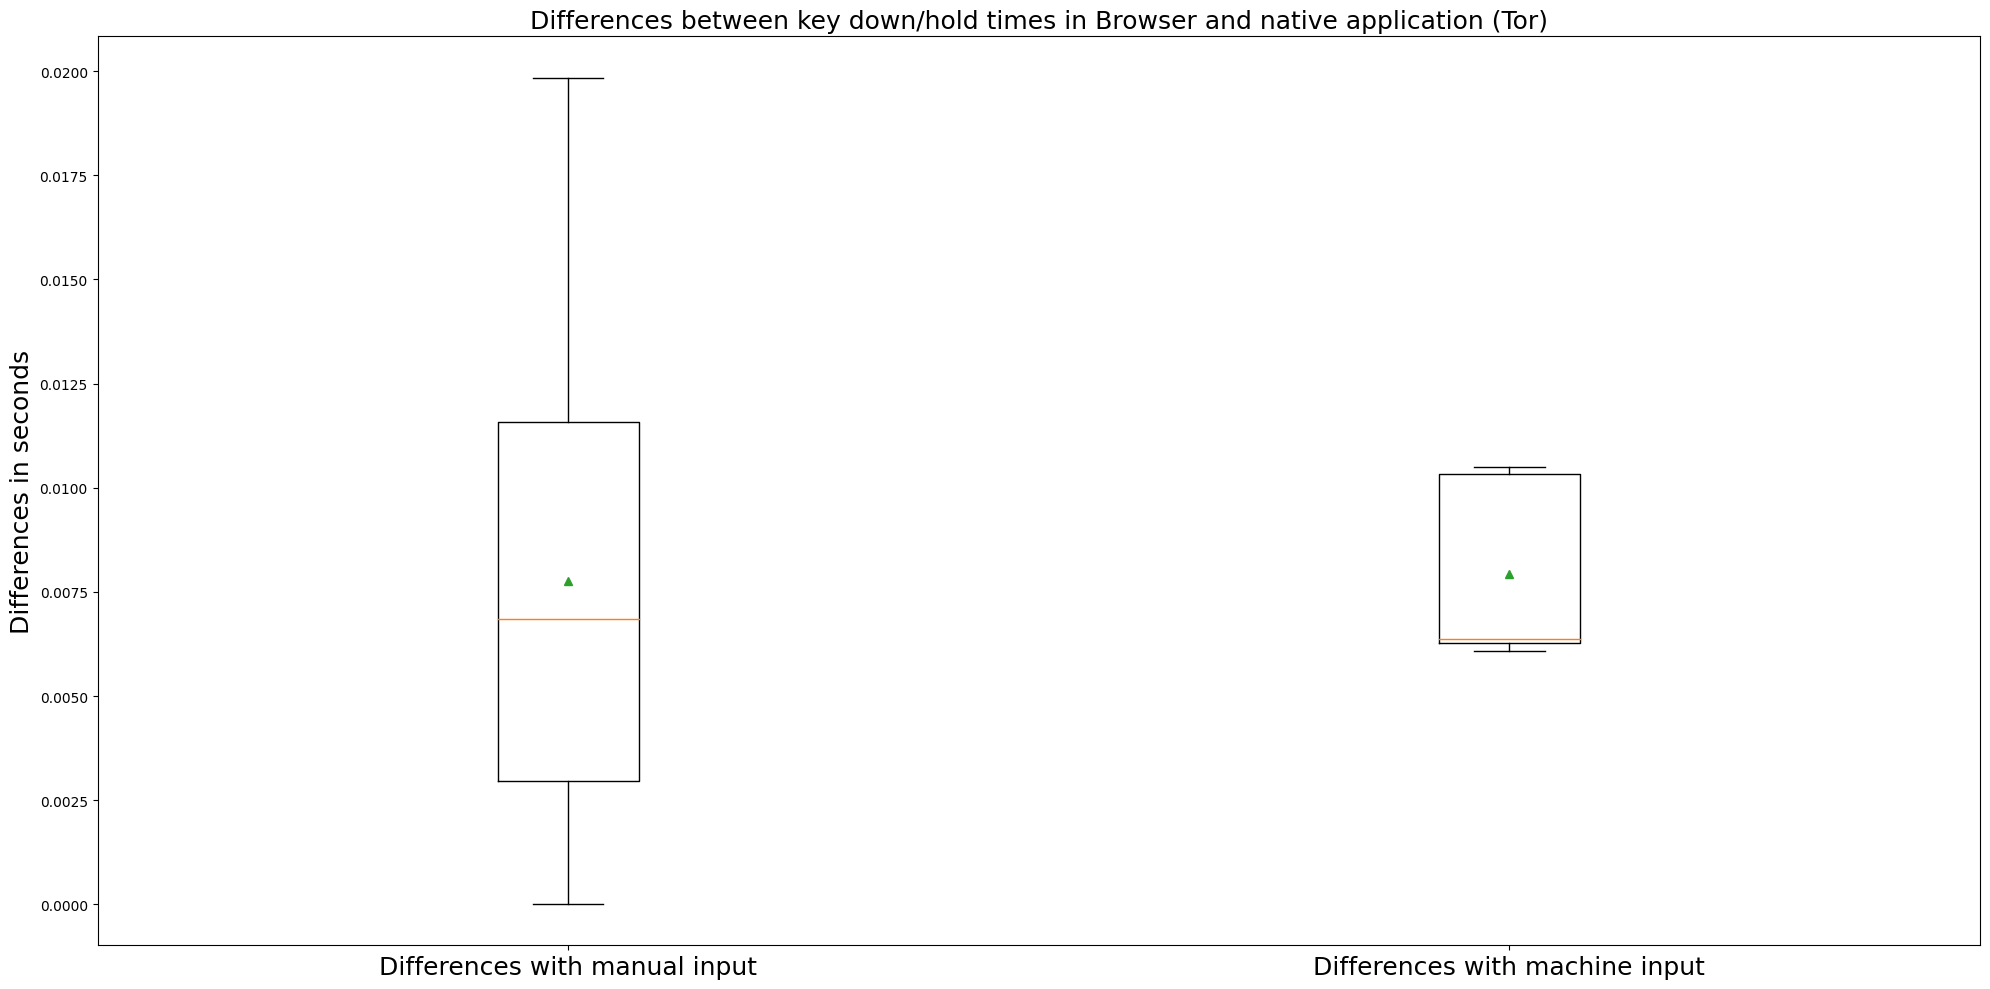

In [8]:
# tor
tor = pd.read_csv("./tor/complete.csv")
tor_diffs = get_keydown_time_differences(tor)
calc(tor_diffs)
tor_diffs_manual = tor_diffs[0]
tor_diffs_machine = tor_diffs[1]


# plot tor
plt.boxplot(
    [
    tor_diffs_manual, tor_diffs_machine
], labels=[
    "Differences with manual input",      
    "Differences with machine input"
], showfliers=False, showmeans=True)
plt.title("Differences between key down/hold times in Browser and native application (Tor)", fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel("", fontsize=18)
plt.ylabel("Differences in seconds", fontsize=18)
plt.tight_layout()
plt.savefig("./tor/fig_holdtime.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()

In [ ]:
# safari
##safari = pd.read_csv("./safari/complete.csv")
#safari_diffs = get_differences(safari)
#safari_diffs_manual = safari_diffs[0]
#safari_diffs_machine = safari_diffs[1]


# plot safari
#plt.boxplot([safari_diffs_manual, safari_diffs_machine], labels=["Differences with manual input",
#            "Differences with machine input"], showfliers=False, showmeans=True)
#plt.title("Differences between key down/hold times in Browser and native application (Safari)", fontsize=18)
#plt.xticks(fontsize=18)
#plt.xlabel("", fontsize=18)
#plt.ylabel("Differences in seconds", fontsize=18)
#plt.tight_layout()
#plt.savefig("./safari/fig_holdtime.jpeg", bbox_inches="tight", pad_inches=0.3)
#plt.show()

Manual
Min:  8.51709999984962e-05
Max:  0.011894892999999601
Mean: 0.0018536048900000962
STD:  0.0022823327848011015
Machine
Min:  2.030200000646687e-05
Max:  0.0055188739999909
Mean: 0.00077625559000084
STD:  0.0009907716304269492


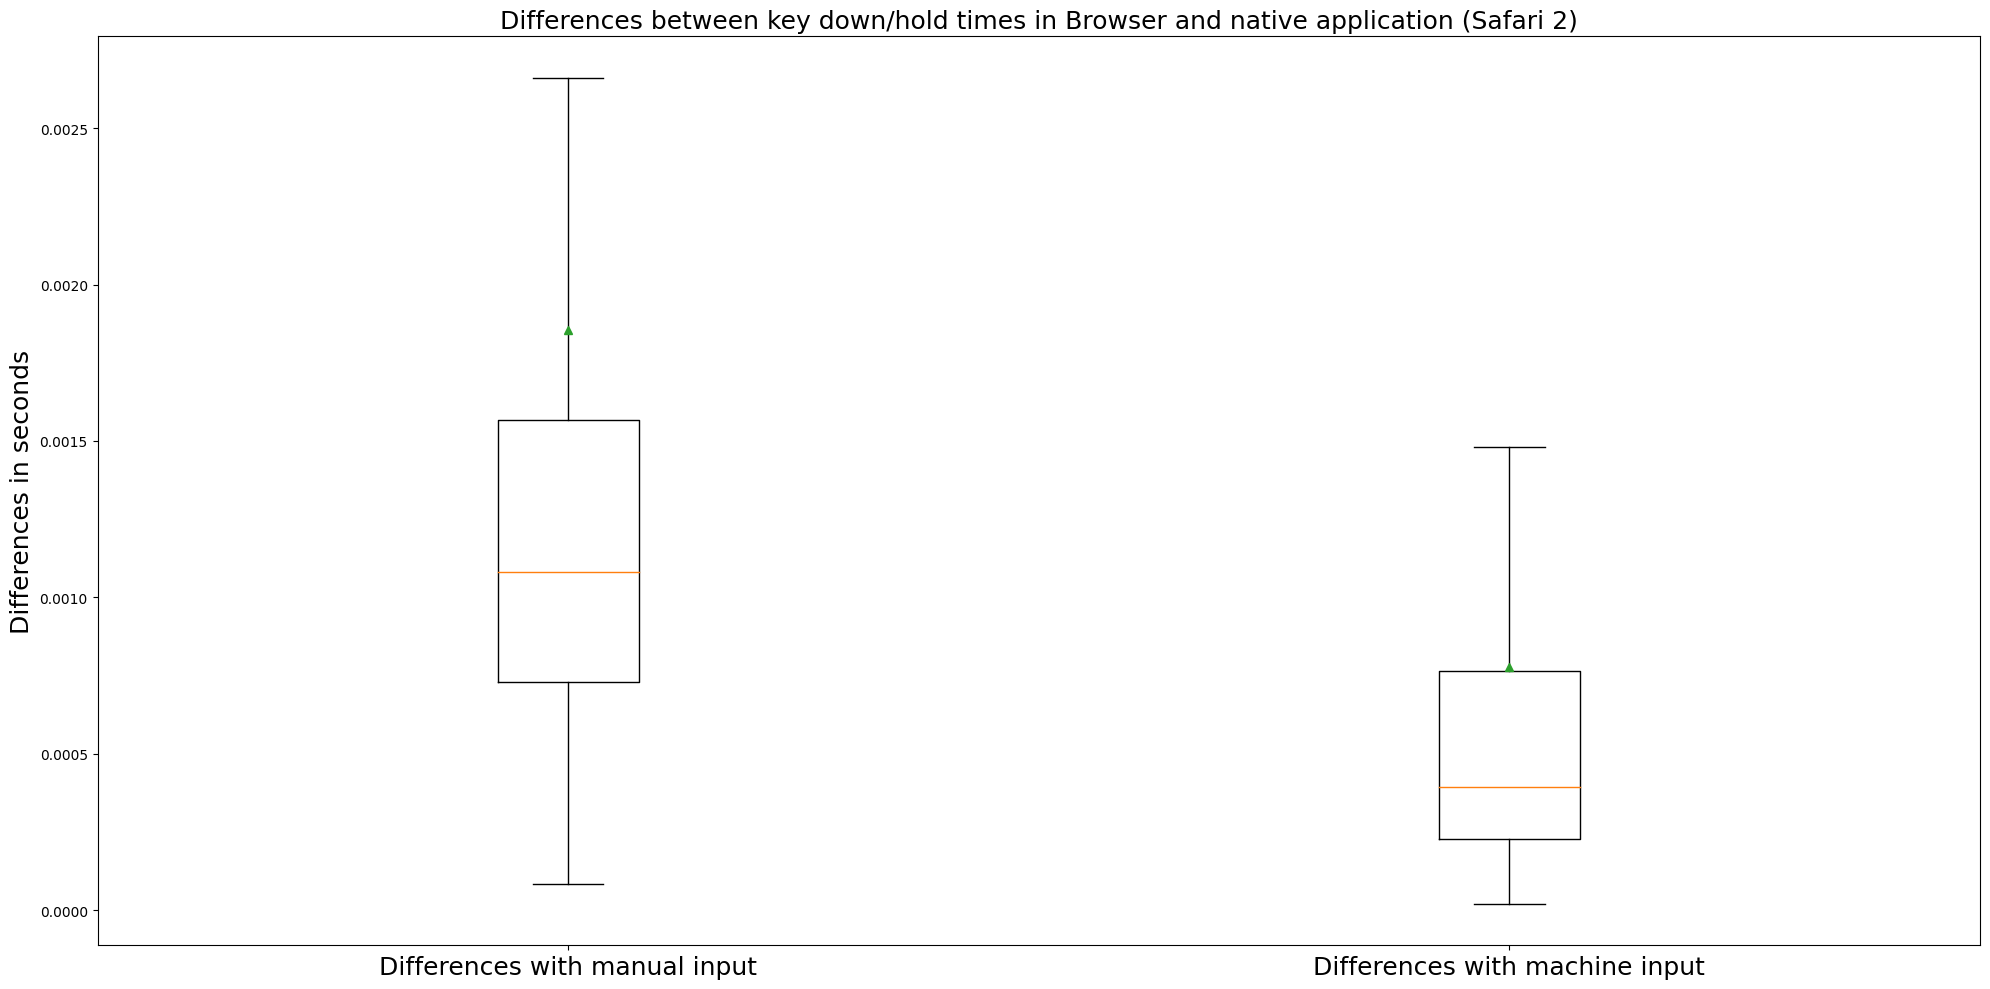

In [9]:
# safari2 
safari2 = pd.read_csv("./safari2/complete.csv")
safari2_diffs = get_keydown_time_differences(safari2)
calc(safari2_diffs)
safari2_diffs_manual = safari2_diffs[0]
safari2_diffs_machine = safari2_diffs[1]


# plot safari2
plt.boxplot([safari2_diffs_manual, safari2_diffs_machine], labels=["Differences with manual input",
            "Differences with machine input"], showfliers=False, showmeans=True)
plt.title("Differences between key down/hold times in Browser and native application (Safari 2)", fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel("", fontsize=18)
plt.ylabel("Differences in seconds", fontsize=18)
plt.tight_layout()
plt.savefig("./safari/fig.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()

In [ ]:
# Combine

firefox = pd.read_csv("./firefox/complete.csv")
firefox_diffs = get_keydown_time_differences(firefox)
firefox_diffs_manual = firefox_diffs[0]
firefox_diffs_machine = firefox_diffs[1]

firefox_resist = pd.read_csv("./firefox_resistF/complete.csv")
firefox_diffs_resist = get_keydown_time_differences(firefox_resist)
firefox_diffs_manual_resist = firefox_diffs_resist[0]
firefox_diffs_machine_resist = firefox_diffs_resist[1]

edge = pd.read_csv("./edge/complete.csv")
edge_diffs = get_keydown_time_differences(edge)
edge_diffs_manual = edge_diffs[0]
edge_diffs_machine = edge_diffs[1] 

chrome = pd.read_csv("./chrome/complete.csv")
chrome_diffs = get_keydown_time_differences(chrome)
chrome_diffs_manual = chrome_diffs[0]
chrome_diffs_machine = chrome_diffs[1]

chromium = pd.read_csv("./chromium/complete.csv")
chromium_diffs = get_keydown_time_differences(chromium)
chromium_diffs_manual = chromium_diffs[0]
chromium_diffs_machine = chromium_diffs[1]

tor = pd.read_csv("./tor/complete.csv")
tor_diffs = get_keydown_time_differences(tor)
tor_diffs_manual = tor_diffs[0]
tor_diffs_machine = tor_diffs[1]

#safari = pd.read_csv("./safari/complete.csv")
#safari_diffs = get_differences(safari)
#safari_diffs_manual = safari_diffs[0]
#safari_diffs_machine = safari_diffs[1]

safari2 = pd.read_csv("./safari2/complete.csv")
safari2_diffs = get_keydown_time_differences(safari2)
safari2_diffs_manual = safari2_diffs[0]
safari2_diffs_machine = safari2_diffs[1]
                                                                     
safari3 = pd.read_csv("./safari3/complete.csv")
safari3_diffs = get_keydown_time_differences(safari3)
safari3_diffs_manual = safari3_diffs[0]
safari3_diffs_machine = safari3_diffs[1]


# plot
plt.boxplot([
    firefox_diffs_manual,firefox_diffs_machine,
    edge_diffs_manual,edge_diffs_machine,
    chrome_diffs_manual,chrome_diffs_machine,
    chromium_diffs_manual,chromium_diffs_machine,
    #safari_diffs_manual, safari_diffs_machine,
    safari2_diffs_manual, safari2_diffs_machine,
    safari3_diffs_manual, safari3_diffs_machine,
    firefox_diffs_manual_resist,firefox_diffs_machine_resist,
    tor_diffs_manual, tor_diffs_machine,
    ], labels=[
    "Manual input (Firefox)", "Machine input (Firefox)",
    "Manual input (Edge)", "Machine input (Edge)",
    "Manual input (Chrome)", "Machine input (Chrome)",
    "Manual input (Chromium)", "Machine input (Chromium)",
    #"Manual input (Safari)", #"Machine input (Safari)",
    "Manual input (Safari 2)", "Machine input (Safari 2)",
    "Manual input (Safari 3)", "Machine input (Safari 3)",
    "Manual input (Firefox | RF)", "Machine input (Firefox | RF)",
    "Manual input (Tor)", "Machine input (Tor)",
    ], showfliers=False, showmeans=True)
plt.title("Differences between key down/hold times in Browser and native application", fontsize=22)
plt.xticks(fontsize=18, rotation=30)
plt.xlabel("", fontsize=18)
plt.ylabel("Differences in seconds", fontsize=18)
plt.tight_layout()
plt.savefig("./fig_holdtime.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()

In [ ]:
# plot
plt.boxplot([
    firefox_diffs_manual,firefox_diffs_machine,
    #firefox_diffs_manual_resist,firefox_diffs_machine_resist,
    edge_diffs_manual,edge_diffs_machine,
    chrome_diffs_manual,chrome_diffs_machine,
    chromium_diffs_manual,chromium_diffs_machine,
    #tor_diffs_manual, tor_diffs_machine,
    #safari_diffs_manual, safari_diffs_machine,
    safari2_diffs_manual, safari2_diffs_machine,
    safari3_diffs_manual, safari3_diffs_machine,
    ], labels=[
    "Manual input (Firefox)", "Machine input (Firefox)",
    #"Manual input (Firefox | RF)", "Machine input (Firefox | RF)",
    "Manual input (Edge)", "Machine input (Edge)",
    "Manual input (Chrome)", "Machine input (Chrome)",
    "Manual input (Chromium)", "Machine input (Chromium)",
    #"Manual input (Tor)", "Machine input (Tor)",
    #"Manual input (Safari)", #"Machine input (Safari)",
    "Manual input (Safari 2)", "Machine input (Safari 2)",
    "Manual input (Safari 3)", "Machine input (Safari 3)",
    ], showfliers=False, showmeans=True)
plt.title("Differences between key down/hold times in Browser and native application", fontsize=22)
plt.xticks(fontsize=18, rotation= 30)
plt.xlabel("", fontsize=18)
plt.ylabel("Differences in seconds", fontsize=18)
plt.tight_layout()
plt.savefig("./fig2_holdtime.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()